In [90]:
#Import Relevant Packages
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

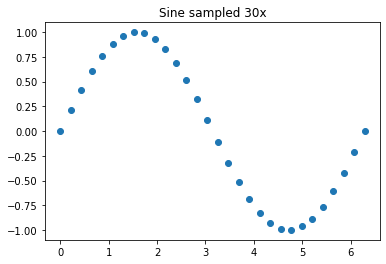

Y1 is sampled 30 times


In [91]:
#Create 30 samples over a length of 2 pi
X1 = np.linspace(0 , 2*np.pi, 30)

#take the sine of those 30 samples
Y1 = np.sin(X1)

#plot it out
plt.scatter(X1, Y1)
plt.title('Sine sampled 30x')
plt.show()

#show length of the sine is composed of 30 points
print('Y1 is sampled ' + str(len(Y1)) + ' times')

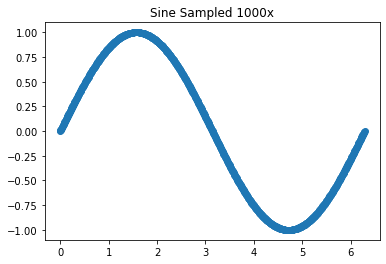

Y2 is sampled 1000 times


In [92]:
#create 1000 samples over a length of 2 pi
X2 = np.linspace(0 , 2*np.pi, 1000)

#take the sine of those 1000 samples
Y2 = np.sin(X2)

#plot it out
plt.scatter(X2, Y2)
plt.title('Sine Sampled 1000x')
plt.show()

#check the length
print('Y2 is sampled ' + str(len(Y2)) + ' times')

Matrix one has the shape (1000, 30)


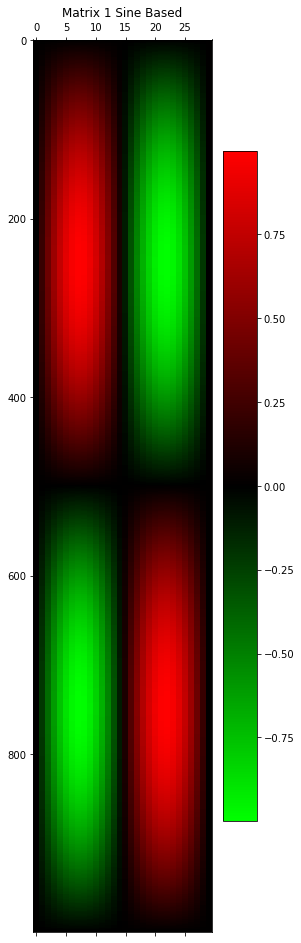

In [93]:
#make matrix 1 with outer product 
Matrix1 = np.outer(Y2, Y1)

#check its shape
print('Matrix one has the shape ' + str(Matrix1.shape))

#make my colormap
cmap_colors = [(0, 1, 0), (0, 0, 0), (1, 0, 0)]  # Green, Black, Red

# Create a colormap with a gradient using LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", cmap_colors, N=256)

#visualize with positive pixels fazing red, negative fazing green. On scale of 1 to -1
plt.matshow(Matrix1, cmap = custom_cmap)
plt.axis('tight')
plt.colorbar()
plt.title('Matrix 1 Sine Based')
plt.show()




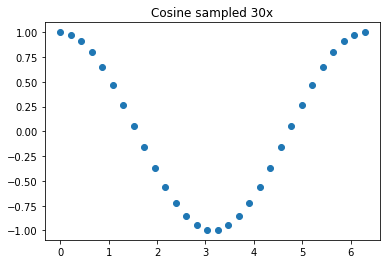

Y3 is sampled 30 times


In [94]:
#Create 30 samples over a length of 2 pi
X3 = np.linspace(0 , 2*np.pi, 30)

#take cosine of the sample
Y3 = np.cos(X3)

#plot it out
plt.scatter(X3, Y3)
plt.title('Cosine sampled 30x')
plt.show()

#check the length
print('Y3 is sampled ' + str(len(Y3)) + ' times')

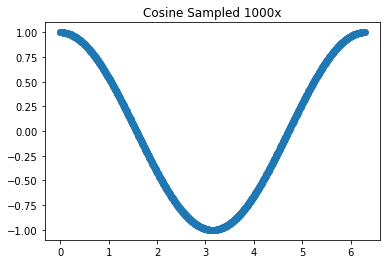

Y4 is sampled 1000 times


In [95]:
#Create 1000 samples over a length of 2 pi
X4 = np.linspace(0 , 2*np.pi, 1000)

#take the cosine of those samples
Y4 = np.cos(X4)

#plot it out
plt.scatter(X4, Y4)
plt.title('Cosine Sampled 1000x')
plt.show()

#check the length
print('Y4 is sampled ' + str(len(Y4)) + ' times')

matrix 2 is the shape (1000, 30)


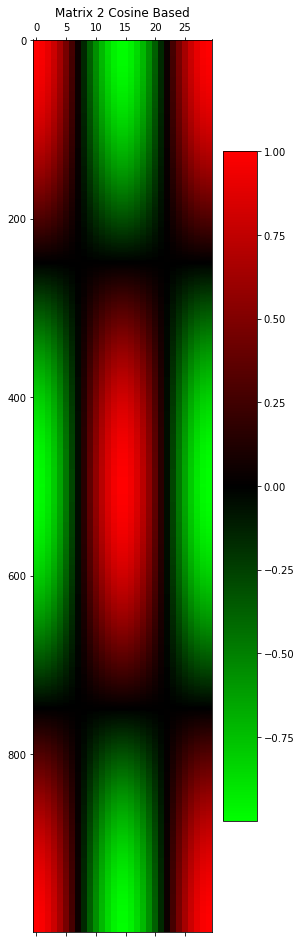

In [96]:
#make matrix 2 with outer product 
Matrix2 = np.outer(Y4, Y3)

#check the shape
print('matrix 2 is the shape ' +str(Matrix2.shape))

#visualize with positive pixels fazing red, negative fazing green. On scale of 1 to -1
plt.matshow(Matrix2, cmap = custom_cmap)
plt.axis('tight')
plt.colorbar()
plt.title('Matrix 2 Cosine Based')
plt.show()


The combined Matrix has the shape (1000, 30)


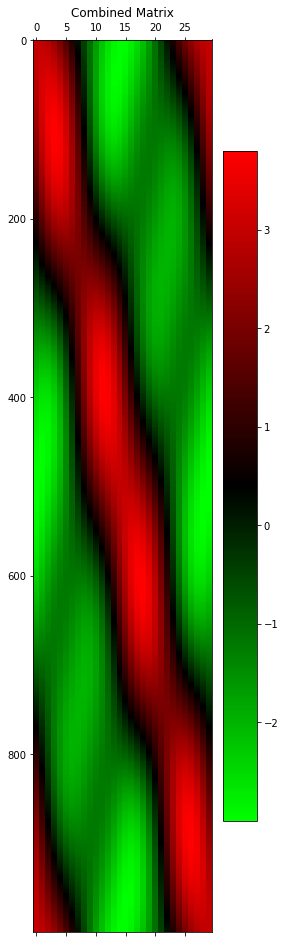

A funky Traveling Wave


In [97]:
#combine matrices to layer 3 distinct patterns with unique weights.
Matrix_comb = 2*Matrix1 +  3*Matrix2 + 5*Matrix1*Matrix2

#check the shape
print('The combined Matrix has the shape ' + str(Matrix_comb.shape))

#visualize with positive pixels fazing red, negative fazing green -- Do i need to set scale 1 to -1?????
plt.matshow(Matrix_comb, cmap = custom_cmap)
plt.axis('tight')
plt.colorbar()
plt.title('Combined Matrix')
plt.show()

print('A funky Traveling Wave')


In [98]:
#Discover the Rank
#take an svd and print the length of sigma. 
#This length will be 30 based on number of columns in the matrix
#Then, loop through the sigma array and count number of relevant weights -- i.e. non-zero values.
#This will identify rank. Given how I created the combined pattern, rank will end up as 3. But will calculate regardless

u, sigma, vt = np.linalg.svd(Matrix_comb, full_matrices= False)

#check unbound sigma is 30
print('unbound sigma is length ' + str(len(sigma)))


rank = 0

for num in sigma:
    if num >0.0000000001:   ###this is any sigma that is relevant###
        rank = rank + 1
    else:
        rank = rank

#print the total relevant rank.
print('the rank is ' + str(rank))

unbound sigma is length 30
the rank is 3


In [99]:
#now do the SVD with the defined rank using scikit-learn.

from sklearn.utils.extmath import randomized_svd

U, S, VT = randomized_svd(Matrix_comb, n_components=rank)



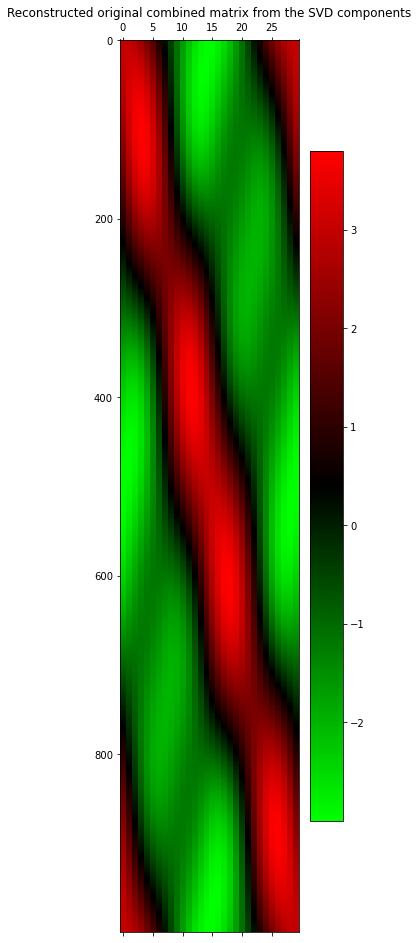

The maximum difference between any two corresponding matrix values is 7.993605777301127e-14.
The original matrix was successfully reconstructed


In [100]:
#reconstruct the combined matrix to verify the SVD components are correct. Recombining from SVD with rank 3
reconstructed_data = U @ np.diag(S) @ VT
plt.matshow(reconstructed_data, cmap = custom_cmap)
plt.axis('tight')
plt.title('Reconstructed original combined matrix from the SVD components')
plt.colorbar()
plt.show()

#numerically check the recombined matrix. Checking with SVD rank 3
#what is maximum difference between any two correcponding values
numerical_check = np.max(abs(Matrix_comb - reconstructed_data))
print('The maximum difference between any two corresponding matrix values is ' + str(numerical_check) + '.' )
print('The original matrix was successfully reconstructed')

In [101]:
#Output the components shapes as well as initial matrix shape. 
#U will have rows of original matrix and columns of rank
#sigma should be an array equal to length of rank
#VT will have rows of rank and number of columns of the original matrix
print('The original matrix has shape ' + str(Matrix_comb.shape))
print('U is of shape ' + str(U.shape))
print('There are ' + str(len(S)) + ' sigma components in the list')
print('V transpose is of the shape ' + str(VT.shape))

print('Considering rank of 3, everything is the right size!')

The original matrix has shape (1000, 30)
U is of shape (1000, 3)
There are 3 sigma components in the list
V transpose is of the shape (3, 30)
Considering rank of 3, everything is the right size!


Sigma Printed as a diagonal
[[264.23427106   0.           0.        ]
 [  0.         170.20869543   0.        ]
 [  0.           0.         106.38043464]]


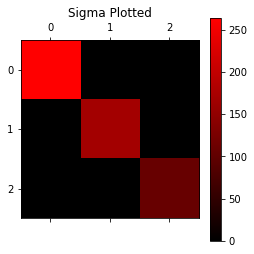

Sigma is Decreasing
Sigma is Decreasing
minimum of rank 3 sigma is 106.38043464378211 which is greater than 0.
Sigma is Diagonal. Has Decreasing Values. All Values are Non-Negative


In [112]:
#Print Sigma
print('Sigma Printed as a diagonal')
print(np.diag(S))

cmap_colors_diag = [(0, 0, 0), (1, 0, 0)]  # Black, Red

custom_cmap_diag = LinearSegmentedColormap.from_list("custom_cmap_diag", cmap_colors_diag, N=256)

#Plot Sigma as a Diagonal
plt.matshow(np.diag(S), cmap = custom_cmap_diag)
plt.colorbar()
plt.title('Sigma Plotted')
plt.show()

#make sure sigma is decreasing
for num in np.arange(0,2):
    if S[num] > S[num+1]:
        print('Sigma is Decreasing')
    else:
        print('Uh Oh. Sigma is not decreasing') 

#make sure sigma is non-negative. Check the minimum
print('minimum of rank 3 sigma is ' + str(np.min(S)) + ' which is greater than 0.')

print('Sigma is Diagonal. Has Decreasing Values. All Values are Non-Negative')

U is ortho-normal with maximum difference between identity matrix and U self-dot is 8.881784197001252e-16


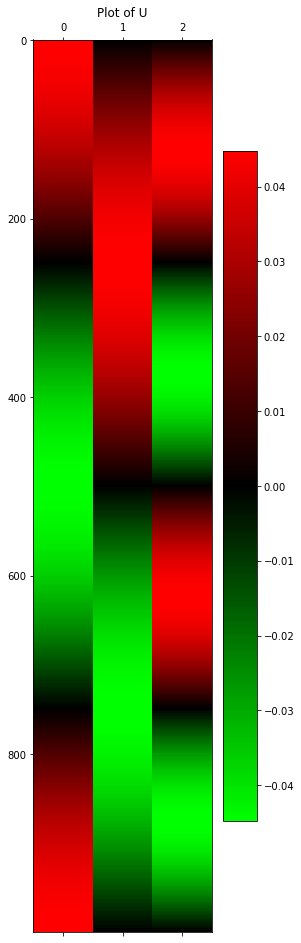

In [113]:
#Way to see U is COLUMN WISEortho-normal, especially with a ton of column in a larger rank
#this will output an identity matrix
#the identity matrix will be of identity rank
UON_check = np.dot(np.transpose(U), U)
UON_ident= np.identity(rank)

print('U is ortho-normal with maximum difference between identity matrix and U self-dot is ' + str(np.max(np.abs(UON_check-UON_ident))))

#plot U
plt.matshow(U, cmap = custom_cmap)
plt.axis('tight')
plt.colorbar()
plt.title('Plot of U')
plt.show()


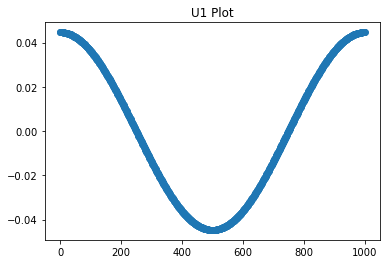

U1 corresponds to rows of Matrix 2


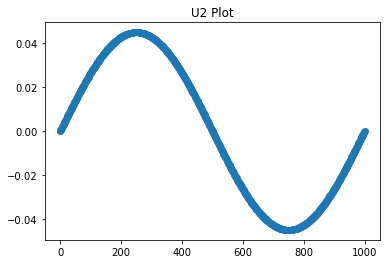

U2 corresponds to rows of Matrix 1


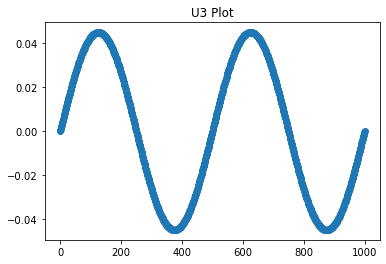

U3 corresponds to theoretical rows of the multiplied matrices added to the combined pattern matrix


In [114]:
U1 = U[:,0]
U2 = U[:,1]
U3 = U[:,2]

#plot components of U
xlen = np.arange(0,1000)
plt.scatter(xlen,U1)
plt.title('U1 Plot')
plt.show()
print('U1 corresponds to rows of Matrix 2')
plt.scatter(xlen,U2)
plt.title('U2 Plot')
plt.show()
print('U2 corresponds to rows of Matrix 1')
plt.scatter(xlen,U3)
plt.title('U3 Plot')
plt.show()
print('U3 corresponds to theoretical rows of the multiplied matrices added to the combined pattern matrix')

U is ortho-normal with maximum difference between identity matrix and VT self-dot is 4.440892098500626e-16


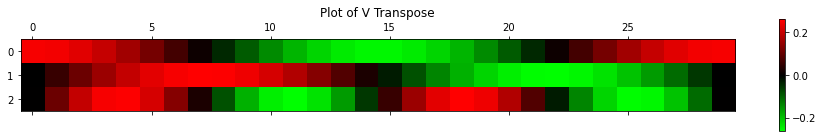

In [115]:
#See VT is ROW WISE ortho-normal
#this will output an identity matrix
#identity of matrix will be of size rank
VTON_check = np.dot(VT,np.transpose(VT))
VTON_ident= np.identity(rank)

print('U is ortho-normal with maximum difference between identity matrix and VT self-dot is ' + str(np.max(np.abs(VTON_check-VTON_ident))))


#plot v transpose
plt.matshow(VT, cmap = custom_cmap)
plt.title('Plot of V Transpose')
plt.colorbar()
plt.show()


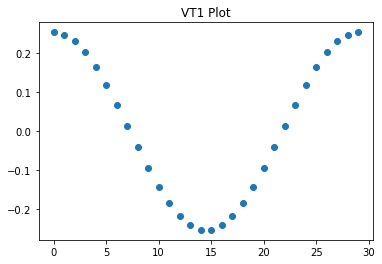

VT1 corresponds to columns of Matrix 2


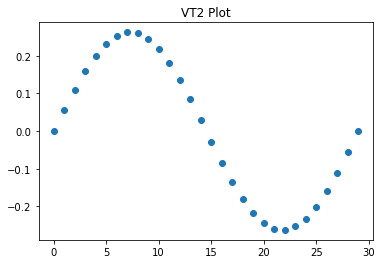

VT2 corresponds to columns of Matrix 1


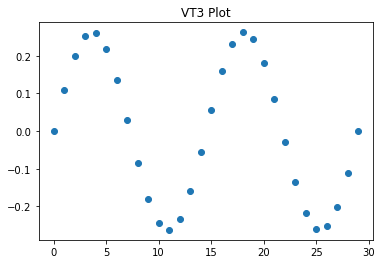

VT3 corresponds to theoretical columns of the multiplied matrices added to the combined pattern matrix


In [116]:
#Plot Components of VT
xlen2 = np.arange(0,30)

VT1 = VT[0,:]
VT2 = VT[1, :]
VT3 = VT[2, :]

plt.scatter(xlen2,VT1)
plt.title('VT1 Plot')
plt.show()
print('VT1 corresponds to columns of Matrix 2')
plt.scatter(xlen2,VT2)
plt.title('VT2 Plot')
plt.show()
print('VT2 corresponds to columns of Matrix 1')
plt.scatter(xlen2,VT3)
plt.title('VT3 Plot')
plt.show()
print('VT3 corresponds to theoretical columns of the multiplied matrices added to the combined pattern matrix')